# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [152]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [153]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [154]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [155]:
boston.data.shape

(506, 13)

In [156]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [157]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [158]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [159]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [160]:
print(boston.target.shape)

(506,)


In [161]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [162]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

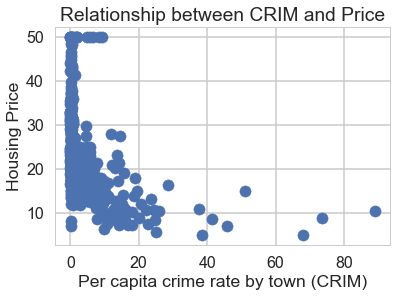

In [163]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

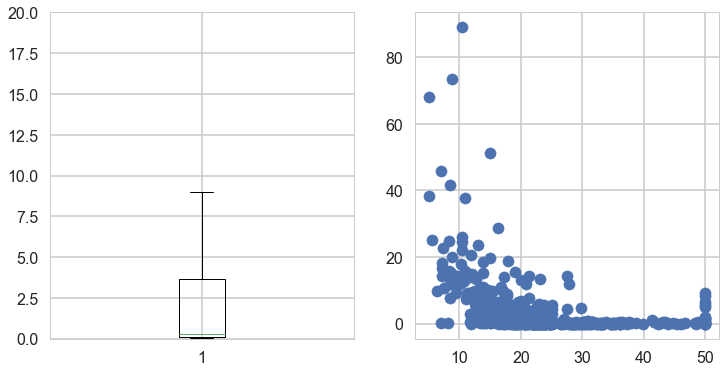

In [164]:
#temp = bos[['CRIM','PRICE']]
plt.figure(figsize = (12,6))

ax2 = plt.subplot2grid((1,2), (0,0))
ax2.boxplot(x=bos.CRIM)
ax2.set_ylim([0,20])  # notice we have limited to 20


ax3 = plt.subplot2grid((1,2), (0,1))
ax3.scatter(bos.PRICE, bos.CRIM)

In [165]:
#print(temp.describe())

t1 = bos.loc[bos['PRICE'] > 40,['CRIM','PRICE'] ]
t2 = bos.loc[bos['PRICE'] <= 40,['CRIM','PRICE'] ]
print("---------------------------")
print(t1.describe())
print("---------------------------")
print(t2.describe())
print("---------------------------")
print(len(t1)/len(t2)*100,"%","Removed")

---------------------------
            CRIM      PRICE
count  31.000000  31.000000
mean    1.555269  47.451613
std     2.539431   3.164161
min     0.013810  41.300000
25%     0.058655  44.400000
50%     0.526930  50.000000
75%     1.491190  50.000000
max     9.232300  50.000000
---------------------------
             CRIM       PRICE
count  475.000000  475.000000
mean     3.726799   20.906526
std      8.834050    6.798844
min      0.006320    5.000000
25%      0.082545   16.500000
50%      0.241030   20.600000
75%      3.695030   24.300000
max     88.976200   39.800000
---------------------------
6.526315789473684 % Removed


In [166]:
bos.PRICE.value_counts().head()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
Name: PRICE, dtype: int64

* increase in crime does decese house price 
* even though we do see increase in crime rate decrese in price we cannot say it is linear as we do have less crime rate area
    spread around from less to big values
* even though we can see significant difference in mean and STD we should be carefull of removing them, me will get bettwe idea     from more analysis
* we have lots of priccw value as 50. which can be something we need to look at

Text(0.5,1,'Relationship between PTRATIO and Price')

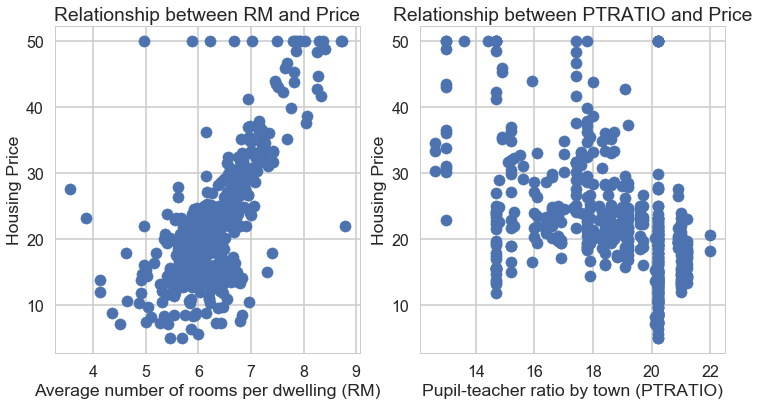

In [167]:
# your turn: scatter plot between *RM* and *PRICE*
plt.figure(figsize = (12,6))

ax2 = plt.subplot2grid((1,2), (0,0))
ax2.scatter(x='RM', y='PRICE', data=bos)
ax2.set_xlabel("Average number of rooms per dwelling (RM)")
ax2.set_ylabel("Housing Price")
ax2.set_title("Relationship between RM and Price")

ax3 = plt.subplot2grid((1,2), (0,1))
ax3.scatter(x='PTRATIO', y='PRICE', data=bos)
ax3.set_xlabel("Pupil-teacher ratio by town (PTRATIO)")
ax3.set_ylabel("Housing Price")
ax3.set_title("Relationship between PTRATIO and Price")

* It looks like a positive linear relation between the Housing Price and the number of rooms per dwelling
* It looks like no relatio between housing price and pupil to teacher ratio. We see that the housing price is uniformly distributed about the entire range regardless of the PTRATIO

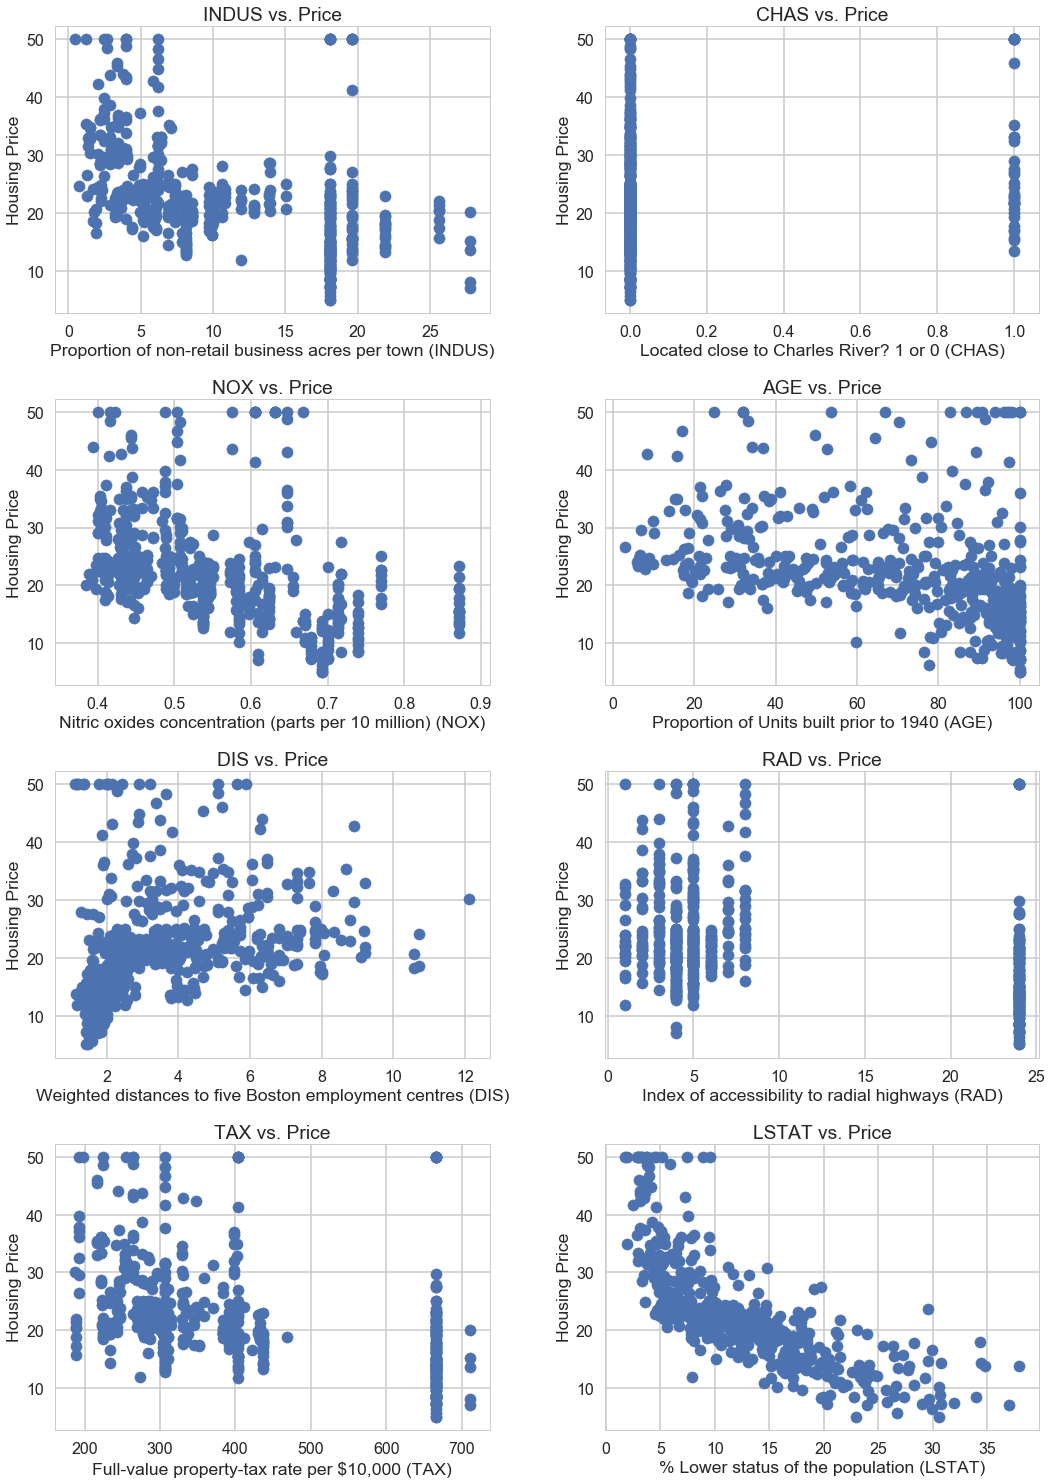

In [168]:
plot_cols = ['INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT']
col_descr = ['Proportion of non-retail business acres per town',
            'Located close to Charles River? 1 or 0', 
            'Nitric oxides concentration (parts per 10 million)', 
            'Proportion of Units built prior to 1940',
            'Weighted distances to five Boston employment centres',
            'Index of accessibility to radial highways',
            'Full-value property-tax rate per $10,000',
            '% Lower status of the population']
f, ax = plt.subplots(4, 2, figsize=(15, 21))
for i, (cols, descr) in enumerate(zip(plot_cols, col_descr)):
    ax[i//2, i%2].scatter(x=cols, y='PRICE', data=bos)
    ax[i//2, i%2].set(xlabel=descr + ' ('+cols+')', ylabel='Housing Price', title = cols+" vs. Price")
plt.tight_layout()

* Housing price doesnt seem to be greatly influenced by the Proportion of non-retail business acres per town(INDUS)
* Having a home on the banks of Charles River has a higher floor on the housing price(CHAS)
* Nitric Oxide concentraion beyond 0.7 parts per 10 million brings down the price of home(NOX)
* Newer community tends to be more expensive(AGE)
* Not much dependency with respect to distance to the Boston employment centers(DIS)
* But for 1 data point, homes are generally cheaper if they are reasonably far from the Radial highways(RAD)
* Higher the lower status of population, the home price are lower (LSTAT)


ZN (proportion of residential land zoned for plots over 25,000 sq. ft.): Weak positive relation (more land zoned leads to greater price)
INDUS (proportion of non-retail business acres per town): Seems to be weak relation.
CHAS (Charles river dummy variable (=1 if tract bounds river, 0 otherwise)): It seems that the houses on the river are more expensive, but not clear from the scatterplot. Could add some summary statistics and a boxplot to see this.
NOX (nitric oxides concentration): Weak negative relation. We would expect a higher nitric oxides concentration to be associated with lower price.
AGE (proportion of owner occupied units built prior to 1940): Negative relation here which makes sense. Older proporties should be chearper. We see that as the proportion of older units increases, price decreases.
    DIS (weighted distances to 5 Boston employment centers): positive relation here. This is counterintuitive. We would expect closer proporties to be more expensive. Maybe it's because the properties that have a farther distance are located in the center of one of the employment centers, which causes them to be expensive, wheras the cheaper properties aren't located in any centers, they just happen to have an average distance to all of them that is lowest?
RAD (index of accessibility to radial highways): It seems like more accessible properties are cheaper. Maybe that's because wealthier individuals want to be hard to get to?
TAX (full-value property-tax rate per $10,000): Lower tax rate seems to result in higher price, which makes sense. The savings in taxes are counterbalanced by a greater home price.
B (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town): Hard to interpret this one. It seems like there is a weak positive relation and all the points are clustered on the right. So the areas with the highest proportion of blacks have both the most and least expensive properties.
LSTAT (% lower status of the population): Definite negative relation here, which makes sense. "Lower status of the population" is probably defined as not having much wealth, so it would follow that they could not afford more expensive homes, and therefore prices should go down for more "lower status" individuals.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

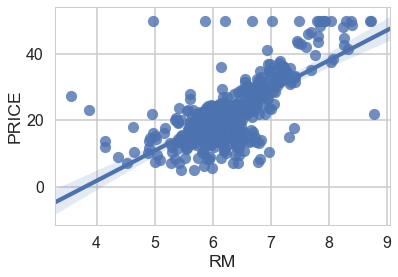

In [169]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)


### Histograms
***


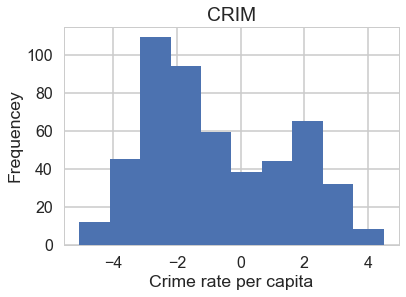

In [170]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

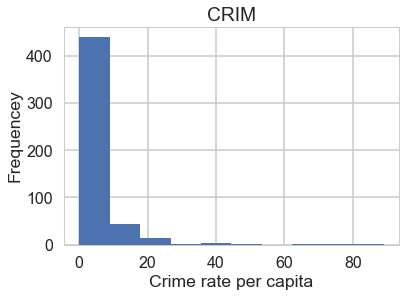

In [171]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

* From the above histogram, we notice that most of the data have crime rate per capita<10.
* Upon closer inspection (with the help of the log histogram plot), we see that there are several towns with crime rate per capital ranging from 0.1 to 0.00001.
* which means above data is right skew adn thus taking log is a better decision



r = -0.36      p = 0.00


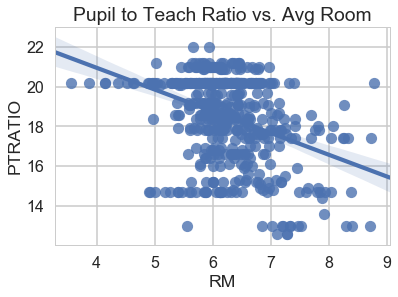

In [172]:
sns.regplot(y="PTRATIO", x="RM", data=bos, fit_reg = True)
plt.title('Pupil to Teach Ratio vs. Avg Room')
stp = stats.pearsonr(bos['PTRATIO'], bos['RM']) 
print("r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1]))

* It seems like the correlation is not strong here. 
* A strong positive correlation would show many examples along a line going from the bottom left to the top right while a strong negative correlation would show many examples going from the top left to the bottom right. We don't see that here
* also by checking with co-relation value being -0.36 being not big enough we cannot say by distribution and by co-relation they are related


r = 0.60      p = 0.00


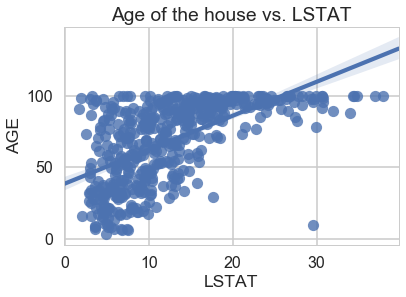

In [173]:
sns.regplot(y="AGE", x="LSTAT", data=bos, fit_reg = True)
plt.title('Age of the house vs. LSTAT')
stp = stats.pearsonr(bos['LSTAT'], bos['AGE']) 
print("r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1]))

* There seems to be a fair bit of correlation her as we do seem to have a diagonal line going up from left to right. 
* This would mean that as the proportion of owner occupied units built prior to 1940 goes up, the propotion of "lower status" individuals goes up.
* we also have high co-relation of around 0.6


## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [174]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [175]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           2.49e-74
Time:                        20:00:37   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

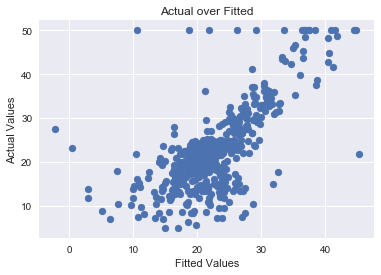

r = 0.60      p = 0.00


In [176]:
# your turn
sns.set()
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel("Fitted Values")
plt.ylabel("Actual Values")
plt.title("Actual over Fitted")
plt.show()

stp = stats.pearsonr(bos['LSTAT'], bos['AGE']) 
print("r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1]))

* here model is overpring some house price
* model has predicted many house as 50,000 which area all overpriced values of a house

### Fitting Linear Regression using `sklearn`


In [177]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [178]:
# Look inside lm object
# lm.<tab>


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [179]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


We can model to not fit an intercept term by assigning fit_intercept paramter to False
    lm = LinearRegression(fit_intercept=False) 
    

>For this problem, i would recommend having an intercept = 0. Intercept = 0 implies that the Price = 0 when all the 13 predictors are 0. 
The key predictor for this problem is RM. RM=0 implies that there is no rooms implying that there is no home. The fact that RM=0 should imply Price = 0 regardless of the other 12 predictors

> In addition to Normal distribution, Residuals needs to have equal variance and 0 mean. Residuals are orthogonal to all the columns of X. If Errors are normally distributed, then Linear Estimator is equivalent to Maximum Likelihood Estimator.

> False. To use linear regression, the residuals must be normal



### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [180]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.49110328036137


In [181]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [182]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [183]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

[(-10, 50)]

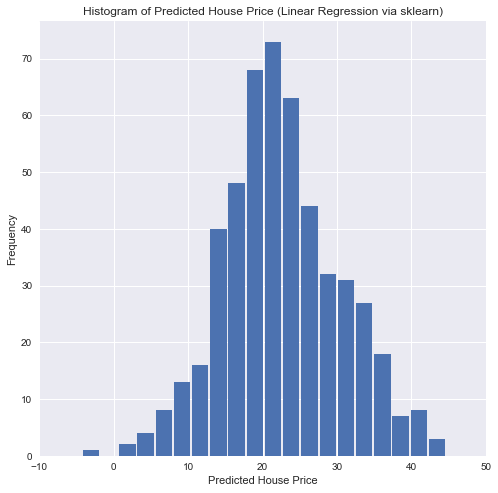

In [184]:
# your turn
f, ax = plt.subplots(figsize=(8, 8))
ax.hist(lm.predict(X), bins=20,rwidth=0.9)
ax.set(ylabel='Frequency', xlabel='Predicted House Price', title='Histogram of Predicted House Price (Linear Regression via sklearn)')
ax.set(xlim=[-10, 50])

In [185]:
predicted_mean=np.mean( lm.predict(X))
print('Mean: ', predicted_mean)
predicted_median=np.median( lm.predict(X))
print('Median: ', predicted_median)
predicted_std_dev=np.std( lm.predict(X))
print('Std Dev: ', predicted_std_dev)

Mean:  22.532806324110677
Median:  22.12062451876073
Std Dev:  7.907071324989921


* The distribution of predicted house prices appears normal with a mean 22.53 and std deviation 7.9. 
* The distribution is skewed right. Median house price is lesser than mean house prices because few houses with very high prices are driving the mean price up. 
* There are a few outliers on both sides of the price spectrum (with high prices as well as low prices). We should analyze these house prices to ascertain that the predictor variables have valid values.
* One of the predicted price is negative. This is impossible and the point should be examined to understand what predictors played a crucial role in this prediction.

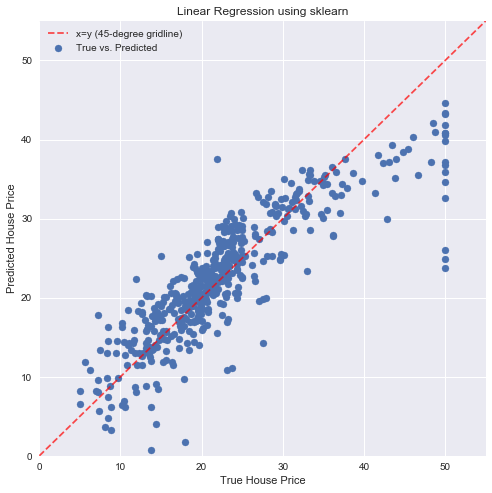

In [187]:
f, ax = plt.subplots(figsize=(8, 8))
ax.plot([0, 55], [0, 55], color='red', ls='--', alpha=0.7)
ax.scatter(x=bos.PRICE, y= lm.predict(X))
ax.set(xlabel='True House Price', ylabel='Predicted House Price', title='Linear Regression using sklearn')
ax.set(xlim=[0, 55], ylim=[0, 55])
ax.legend(('x=y (45-degree gridline)', 'True vs. Predicted'))


#### statsmodel

* statsmodel provides a nice tabular version of the summary statistic with information on AIC, F-statistic, t-statistic on every coefficient and intercept and its p-value

#### sklearn

* sklearn has several other uses.
* It contains several other models like kNN, Logistic Regression, ElasticNet, Ridge Regression, Lasso,
* It provides easy means of hyperparameter tuning using RandomizedSearchCV and GridSearchCV
* Provides tools for cross validation
* Pipeline framework to elegantly Impute, Scale/Center and Model the data

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [190]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

1.4385510957606775e-22


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [198]:
# Using sklearn: Linear Regression between PTRATIO and PRICE

lm.fit(X[['PTRATIO']], bos.PRICE)
lm.coef_, lm.intercept_

(array([-2.1571753]), 62.34462747483265)

* The coefficient indicates a negative dependency on Pupil to Teacher ratio (PTRATIO). For every increase in one unit of PTRATIO, the home price falls by $\$$2157. This indicates a weak dependency
* The intercept of 62 indicates that with a PTRATIO of 0 (no pupil), the home price would be $\$$ 62344. In other words, $\$$ 62344 would be the maximum possible home price since PTRATIO cannot take on a negative value.

In [199]:
# R^2 value
R2 = lm.score(X[['PTRATIO']], bos.PRICE)
print('R^2 value = {0:.3f}'.format(R2))

R^2 value = 0.258



0.258 is a relatively low $R^2$ value. This indicates that only 25.8% of the total variance in the observed price has been explained by our model.

In [200]:
N, K = len(bos.PRICE), 1

F_stat = R2/(1-R2)*(N-K-1)/K

df1, df2 = N-K, K-1
print('F-statistic = {0:.2f}'.format(F_stat))

p_value = 1-stats.f.cdf(F_stat, df1, df2)
print('p_value = {}'.format(p_value))

F-statistic = 175.11
p_value = nan


In [196]:
# Using statsmodel to obtain f-statistic and p-value
m_ptratio = ols('PRICE ~ PTRATIO',bos).fit()
print(m_ptratio.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.61e-34
Time:                        20:22:18   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

* The p-values for the t-tests correspond to the null hypothesis of the PTRATIO coefficient being equal to 0. Hence t-statisitic of -13 with a p-value ~0 indicates that the coefficient cannot be equal to 0 and, as the F-statistic test indicated, House Price has a dependency on the PTRATIO feature.

* Note t-test assess only 1 regression coefficient at a time, while f-test assess multiple coefficient simulateneously. Since the above model has just 1 variable, both t-test and f-test would give identical conclusion

* The ols summary also provides the PTRATIO Coeff = -2.15 with 95% confidence interval of [-2.47, -1.83]

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [248]:
# Using statsmodel - CRIM + RM + PTRATIO
m_3= ols('PRICE ~ CRIM+RM+PTRATIO',bos).fit()
print(m_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           1.09e-97
Time:                        21:47:30   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

* F-statistic = 244.2 with a p-value = $1.09 \times 10^-{97}$. This tells us that all the coef being 0 (intercept-model) is very unlikely and the above linear model (linear function of the 3 features) is a better fit than intercept-model (= mean of the all the target price variable)
* $R^2 = 0.593$. Indicates that 59.3% of the variance in the price observations have been accounted for in our model. Hence, this is a far better model than the previous PTRATIO-only linear model.
* The p-values for all the 3 coefficient is close to 0. This indicates that all the variables (CRIM, RM, PTRATIO) are individually significant in determining the price of the house. Looking at the absolute coeffienct values, we observe that RM has the greatest impact in the house price. Increase in 1 RM unit would result in an increase in house price by $\$$7382. On similar lines, increase in per capita crime rate and Pupil to Teacher ratio by 1 unit would result in an **decrease** in house price by $\$$202 and $\$$1074, respectively

From the above printout, we see that the F statistic is 244.2. When used in conjuction with the F distribution, we are able to determine the probability of the Null Hypothesis that all betas are equal to 0. In our case, we see this probability is virtually 0, so we can reject the Null Hypothesis.



## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [264]:
m5 = ols('PRICE ~  CRIM + RM + PTRATIO  + CHAS  + NOX ',bos).fit()


In [265]:
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     167.8
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          1.63e-104
Time:                        21:59:40   Log-Likelihood:                -1591.0
No. Observations:                 506   AIC:                             3194.
Df Residuals:                     500   BIC:                             3219.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2440      4.305      1.683      0.0

In [256]:
m5.ssr   # np.sum((bos.PRICE - m5.predict(X)) ** 2) # RSS Value(Residual sum of squares)

15949.561641115055

In [254]:
df5 = len(bos.PRICE)-6-1
df3  = len(bos.PRICE)-3-1

F = ((m_3.ssr-m5.ssr)/(df3-df5))/(m5.ssr/df5)

print('F-statistic comparing 5-feature model with 3-feature model: {0:.3f}'.format(F))

F-statistic comparing 5-feature model with 3-feature model: 14.791


In [212]:
# F-test comparing the two models
df6, df3 = len(bos.PRICE)-6-1, len(bos.PRICE)-3-1
F = ((m_3features.ssr-m_6features.ssr)/(df3-df6))/(m_6features.ssr/df6)
print('F-statistic comparing 6-feature model with 3-feature model: {0:.3f}'.format(F))

F-statistic comparing 6-feature model with 3-feature model: 48.159


* High value of F ratio indicates that the 5-feature model is more accurate. F ratio closer to 1 would indicate that adding more variables didnt bring in any benefit and hence, the simpler model suffices.

* RSS for simpler model would be higher. Adding in the 2 other feature  (CHAS  and NOX) reduced the RSS such that the F-ratio is 48.159

* This indicates that the 5-feature is a better fitting model than the originial 3-feature model

* Comparing AIC: AIC for 3 feature model = 3534 > AIC for 5 feature model = 3194. Lower the AIC, the better fitting model it is. Hence modeling the house price using the 5 feature provides a better estimate


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

[Text(0,0.5,'Residuals'),
 Text(0.5,0,'Model Fitted House Price'),
 Text(0.5,1,'Residual vs Fitted Values')]

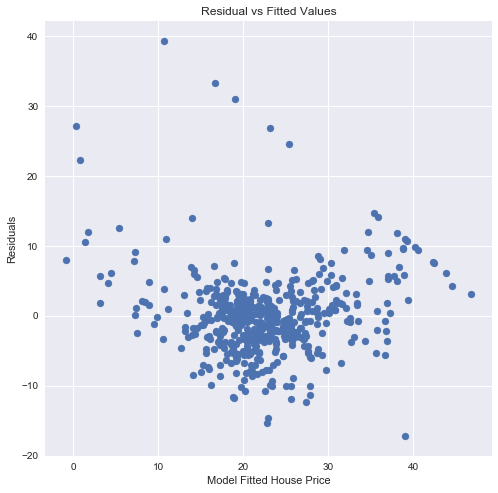

In [270]:
# Exercise: Construct a fitted values versus residuals plot. What does the plot tell you?
# Are there any violations of the model assumptions?
# Residual vs. Fitted value plot

f, ax = plt.subplots(figsize=(8, 8))
ax.scatter(m_3.fittedvalues, m_3.resid)
ax.set(xlabel='Model Fitted House Price', ylabel='Residuals', title='Residual vs Fitted Values')

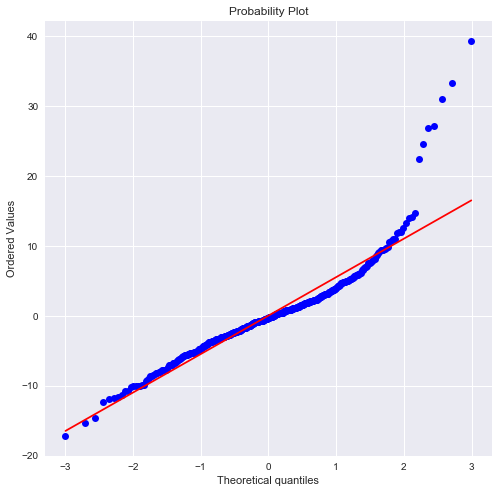

In [278]:
import pylab
f, ax = plt.subplots(figsize=(8, 8))
stats.probplot(m_3.resid, dist='norm', plot=ax)
plt.show()

* The fitted vs residues plot show a random distribution of the residues confirming their i.i.d (independent and identically distributed) nature. 
* The quantile-quantile plot of the residue is close to a straight line stating that the residues follow a normal distribution.
* The fitted vs residual plot signify whether the distribution of residues w.r.t fitted values is random. Similarly, the QQ plot throws light on the question whether the residues follow a normal distribution.

In [294]:
# Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

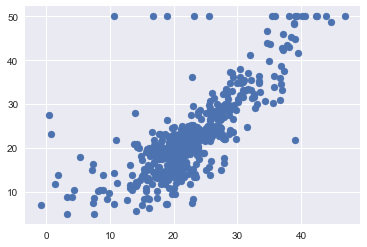

In [290]:

plt.scatter(m_3.fittedvalues, bos.PRICE)

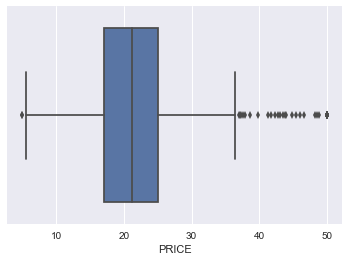

In [313]:
sns.boxplot(bos.PRICE)

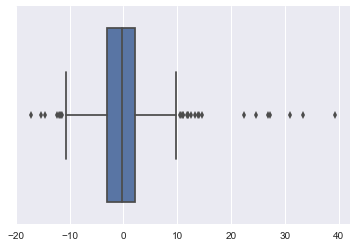

In [312]:
sns.boxplot(m_3.resid)

* From the above plot, it is evident that there are many houses with very high price. These are proabably the outliers in the dataset. 
* Also from residual plot it it cler that some with residual value above approx 20 or lesss than about -15 are definitive outlier 
* Form the actual vs predicted plot, it is evident that our model is not doing a good job of predicting these outliers. 
* We may like to build another stable model after excluding these outliers from the training dataset. 

In [309]:
Q1 = m.resid.quantile(0.25)
Q3 = m.resid.quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + (2.5*IQR)
lower = Q1 - (2.5*IQR)
outliers = m.resid[(m.resid > upper) | (m.resid < lower)]
outlier_indices = outliers.keys()
bos.PRICE[outlier_indices].describe()

count    12.000000
mean     35.658333
std      15.326178
min      13.800000
25%      22.800000
50%      38.750000
75%      50.000000
max      50.000000
Name: PRICE, dtype: float64

In [310]:
new = X.loc[outlier_indices,]
prices = bos.PRICE[outlier_indices]
fitted = m.fittedvalues[outlier_indices]
fitted.name = "fitted"
new = new.join(prices)
new = new.join(fitted)
new['resid'] = new['PRICE'] - new['fitted']
new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,fitted,resid
186,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0,34.498867,15.501133
214,0.28955,0.0,10.59,0.0,0.489,5.412,9.8,3.5875,4.0,277.0,18.6,348.93,29.55,23.7,9.293248,14.406752
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,39.475739,-17.575739
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,11.437472,16.062528
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,8.895940,14.204060
368,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,19.873693,30.126307
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,30.706047,19.293953
370,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,32.574764,17.425236
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,21.849983,28.150017
372,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,24.109271,25.890729


* They all have positive residues with values > 15 or less than -15
* They all have identical ZN, INDUS, RAD, TAX, PTRATIO and similar NOX(Except 214 and 186)
* This tends to hint that all these observations are from the same town/locality
* The reason for high residue is due to our models low prediction relative to its true price.
* Since our model just uses 'CRIM', 'PTRATIO' and 'RM', we notice that the per capita crime rate is very high at these outlier points. All the CRIM values are > 75 percentile points. Though not modelled, the NOX value too is >75 percentile value. This indicates that the neighborhood under consideration is not the best and it is very unlikely that the house price here is 50k (which is the highest provided in this data set)
*  Hence, we remove above 10 outliers from our data set and try to understand more about 186 and 214

 ## Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

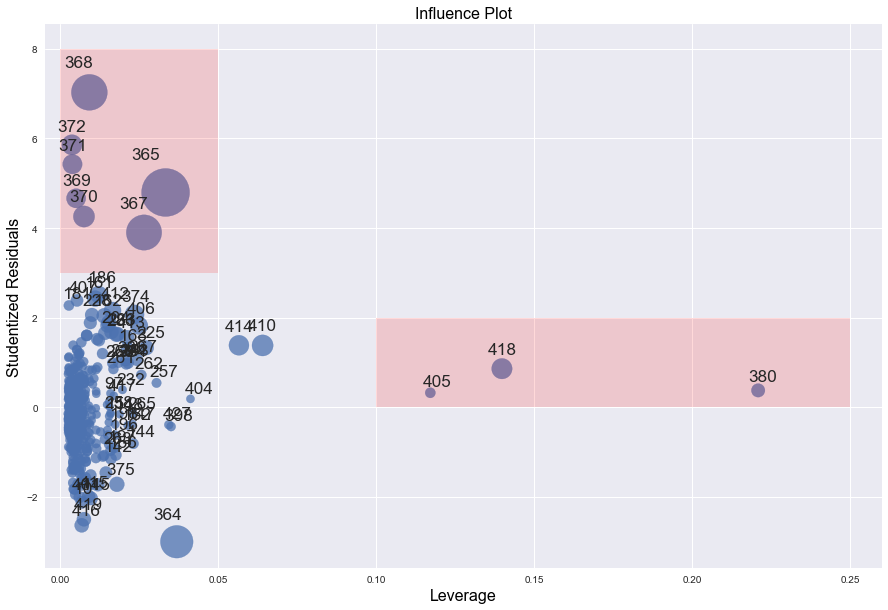

In [316]:
from statsmodels.graphics.regressionplots import *
fig, axes = plt.subplots(figsize=(15,10))

fig = influence_plot(m_3features, ax = axes)
axes.fill_between([0.1,0.25], 0, 2, facecolor='red', alpha = .15, interpolate=True)
axes.fill_between([0, 0.05], 3, 8, facecolor='red', alpha = .15, interpolate=True)
axes.set(xlim=[-0.005, 0.26], xlabel = 'Leverage')
plt.show()

* The above plots the Leverage vs. Studentized Residuals with the size of the circle indicating the influence the observation has.
* The 7 observations [365, 367, 368, 369, 370, 371, 372] are have high residues. These have been as outliers above in the 'Outlier Detection' section as having residues > 20
* The other block of 3 observations [ 405, 414, 418] are all high leverage points. High leverage correspond to those observations whose 'x' values are extreme. Let us look into these 5 observations to see what are the extreme values in these observations
* 364 is still i think is outlier but observation of 186,214,374,412 seems like it should not be outlier

In [318]:
bos.iloc[[380, 405,  418]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8


In [319]:
bos['zstar_CRIM'] = (bos.CRIM-np.mean(bos.CRIM))/np.std(bos.CRIM)
print('The 5 highest per capita crime rate: \n{}'.format(bos[['CRIM', 'zstar_CRIM']].sort_values('CRIM').tail(5)))

The 5 highest per capita crime rate: 
        CRIM  zstar_CRIM
414  45.7461    4.908122
410  51.1358    5.535686
405  67.9208    7.490093
418  73.5341    8.143692
380  88.9762    9.941735


In [321]:
bos.iloc[[380, 405, 410, 414, 418]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,zstar_CRIM
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4,9.941735
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0,7.490093
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0,5.535686
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0,4.908122
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8,8.143692


* we will aslos drop 410 and 414 as they seems to be floded in fact all those high crime rate place seems be floded data

#### Remove Outliers and High Leverage Points and redo Regression¶


In [323]:
bos_clean = bos.drop([364,365, 367, 368, 369, 370, 371, 372, 380, 405, 410, 414, 418], axis=0)
bos_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 505
Data columns (total 15 columns):
CRIM          493 non-null float64
ZN            493 non-null float64
INDUS         493 non-null float64
CHAS          493 non-null float64
NOX           493 non-null float64
RM            493 non-null float64
AGE           493 non-null float64
DIS           493 non-null float64
RAD           493 non-null float64
TAX           493 non-null float64
PTRATIO       493 non-null float64
B             493 non-null float64
LSTAT         493 non-null float64
PRICE         493 non-null float64
zstar_CRIM    493 non-null float64
dtypes: float64(15)
memory usage: 61.6 KB


In [324]:
m_clean = ols('PRICE ~ CRIM+RM+PTRATIO',bos_clean).fit()
print(m_clean.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     441.7
Date:                Sat, 30 Mar 2019   Prob (F-statistic):          9.41e-139
Time:                        16:09:49   Log-Likelihood:                -1447.2
No. Observations:                 493   AIC:                             2902.
Df Residuals:                     489   BIC:                             2919.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.0204      3.270     -2.759      0.0

* With outliers removed, the $R^2$ increases from 0.593 to 0.730 indicating a better fit model
* The AIC decreases too (from 3233 to 2902) which is again an indication of a better model
* The Intercept has a significant lower p-value than before (reduced from 0.413 to 0.006)

[Text(0,0.5,'Residuals'),
 (-5, 50),
 Text(0.5,0,'Model Fitted House Price'),
 Text(0.5,1,'Residual vs. Fitted Values')]

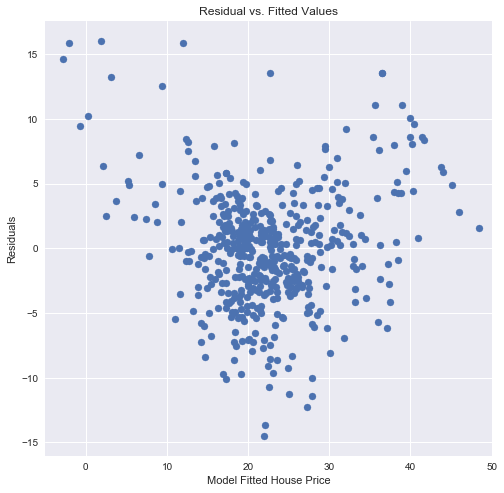

In [325]:
# Residual vs. Fitted value plot
f, ax = plt.subplots(figsize=(8, 8))
ax.scatter(m_clean.fittedvalues, m_clean.resid)
ax.set(xlabel='Model Fitted House Price', ylabel='Residuals', title='Residual vs. Fitted Values', xlim = [-5, 50])

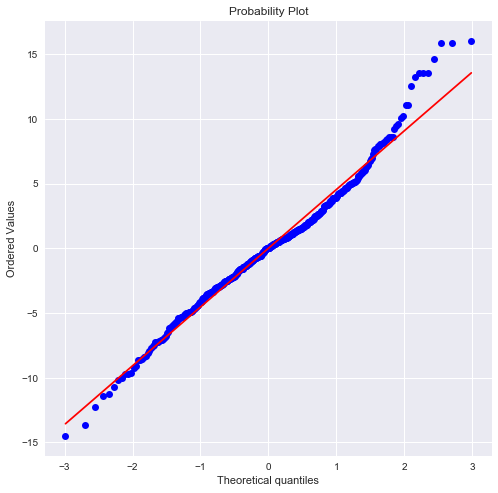

In [326]:
f, ax = plt.subplots(figsize=(8, 8))
stats.probplot(m_clean.resid, dist='norm', plot=ax)
plt.show()


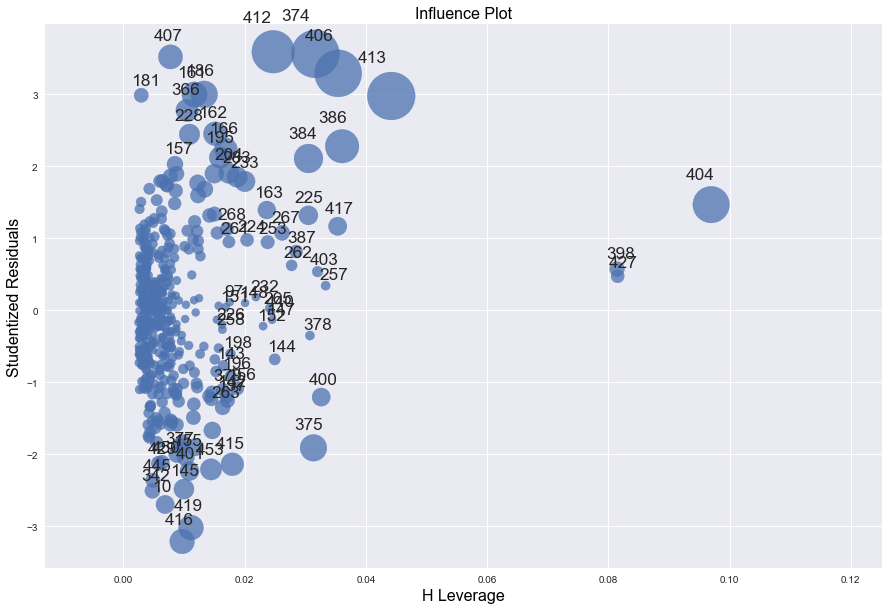

In [327]:
from statsmodels.graphics.regressionplots import *
fig, axes = plt.subplots(figsize=(15,10))
fig = influence_plot(m_clean, ax = axes)
#axes.fill_between([0.05,0.25], 0, 2, facecolor='red', alpha = .15, interpolate=True)
#axes.fill_between([0, 0.05], 3, 8, facecolor='red', alpha = .15, interpolate=True)
#axes.set(xlim=[-0.005, 0.26], xlabel = 'Leverage')
plt.show()

Most of the high-leverage and high-residue observations are absent


* Linear regression model is formed by using CRIM, RM and PTRATIO as the key predictors
* 8 outliers and 5 high leverage observations were removed out of the 506 provided observations
* Linear model is obtained using OLS by minimizing the Least Square
* The obtained model provides good estimate of the house price with $R^2 = 0.730$ and $AIC = 2902$